In [371]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import ensemble, tree, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# DATA PRE-PROCESSING

In [373]:
df = pd.read_csv('Bioactivity dataset from CHEMBL.csv')
df

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value
0,CHEMBL177257,NaN,NaN,321.74,0.0,2.60,8j,CCOC(=O)c1c(O)c2cccc(F)c2[n+]2ccccc12.[Cl-],EC50,'=',...,CHEMBL1148470,1.0,Scientific Literature,J Med Chem,2004.0,NaN,NaN,NaN,NaN,70.500
1,CHEMBL1831049,NaN,NaN,516.58,1.0,3.47,9,Cc1ccc(C2c3c4c(c(-c5ccccc5)n3-c3ccccc3N2S(C)(=...,IC50,NaN,...,CHEMBL1828512,1.0,Scientific Literature,J Med Chem,2011.0,NaN,NaN,NaN,NaN,NaN
2,CHEMBL1831051,NaN,NaN,480.52,0.0,4.05,11,CC(=O)N1c2ccccc2-n2c(-c3ccccc3)c3c(=O)n(C)c(=O...,IC50,NaN,...,CHEMBL1828512,1.0,Scientific Literature,J Med Chem,2011.0,NaN,NaN,NaN,NaN,NaN
3,CHEMBL1403454,NaN,NaN,390.44,0.0,3.27,CoPo-02,COc1ccc(C(=O)NCCNc2nc3ccc(C)cc3cc2C#N)cc1OC,Vmax,'=',...,CHEMBL4364316,1.0,Scientific Literature,Eur J Med Chem,2019.0,NaN,NaN,NaN,NaN,297.000
4,CHEMBL4465098,NaN,NaN,561.64,2.0,6.88,5,COc1ccc(C(F)(F)F)cc1CO[C@@H]1[C@@H](C(C)(C)C)[...,EC50,'=',...,CHEMBL4312040,1.0,Scientific Literature,ACS Med Chem Lett,2019.0,NaN,NaN,NaN,NaN,1.320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,CHEMBL2010601,IVACAFTOR,4.0,392.50,1.0,5.08,1,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,'=',...,CHEMBL5036320,1.0,Scientific Literature,J Med Chem,2021.0,NaN,NaN,ACTIVATOR,NaN,0.068
2456,CHEMBL1257047,NaN,NaN,510.66,1.0,4.42,25; VRT-325,COc1ccc(S(=O)(=O)N2CCN(C(C)c3nc(OC4CCCCC4)c4cc...,Emax,'=',...,CHEMBL3745695,1.0,Scientific Literature,J Med Chem,2015.0,NaN,NaN,NaN,NaN,92.900
2457,CHEMBL3745884,NaN,NaN,401.51,0.0,3.06,21,OC1CCCN(c2nc(-c3ccccn3)nc3c2CN(Cc2ccccc2)CC3)C1,Emax,'=',...,CHEMBL3745695,1.0,Scientific Literature,J Med Chem,2015.0,NaN,NaN,NaN,NaN,62.900
2458,CHEMBL3746756,NaN,NaN,457.63,0.0,3.15,27,CN1CCN(CCCNc2nc(-c3ccccn3)nc3c2CN(Cc2ccccc2)CC...,Emax,NaN,...,CHEMBL3745695,1.0,Scientific Literature,J Med Chem,2015.0,CHEMBL3307651,NaN,NaN,NaN,NaN


In [374]:
#This is to check the different columns
df.columns.values

array(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment',
       'Comment', 'Uo Units', 'Ligand Efficiency BEI',
       'Ligand Efficiency LE', 'Ligand Efficiency LLE',
       'Ligand Efficiency SEI', 'Potential Duplicate', 'Assay ChEMBL ID',
       'Assay Description', 'Assay Type', 'BAO Format ID', 'BAO Label',
       'Assay Organism', 'Assay Tissue ChEMBL ID', 'Assay Tissue Name',
       'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession',
       'Assay Variant Mutation', 'Target ChEMBL ID', 'Target Name',
       'Target Organism', 'Target Type', 'Document ChEMBL ID',
       'Source ID', 'Source Description', 'Document Journal',
       'Document Year', 'Cell ChEMBL ID', 'Properties', 'Action Type',
       'Standard T

In [375]:
#This is to filter the dataset to only the 4 required columns
df = df.filter(['Molecule ChEMBL ID', 'Smiles', 'Standard Type', 'pChEMBL Value'])
df

,Molecule ChEMBL ID,Smiles,Standard Type,pChEMBL Value
0,CHEMBL177257,CCOC(=O)c1c(O)c2cccc(F)c2[n+]2ccccc12.[Cl-],EC50,4.15
1,CHEMBL1831049,Cc1ccc(C2c3c4c(c(-c5ccccc5)n3-c3ccccc3N2S(C)(=...,IC50,NaN
2,CHEMBL1831051,CC(=O)N1c2ccccc2-n2c(-c3ccccc3)c3c(=O)n(C)c(=O...,IC50,NaN
3,CHEMBL1403454,COc1ccc(C(=O)NCCNc2nc3ccc(C)cc3cc2C#N)cc1OC,Vmax,NaN
4,CHEMBL4465098,COc1ccc(C(F)(F)F)cc1CO[C@@H]1[C@@H](C(C)(C)C)[...,EC50,5.88
...,...,...,...,...
2455,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.17
2456,CHEMBL1257047,COc1ccc(S(=O)(=O)N2CCN(C(C)c3nc(OC4CCCCC4)c4cc...,Emax,NaN
2457,CHEMBL3745884,OC1CCCN(c2nc(-c3ccccn3)nc3c2CN(Cc2ccccc2)CC3)C1,Emax,NaN
2458,CHEMBL3746756,CN1CCN(CCCNc2nc(-c3ccccn3)nc3c2CN(Cc2ccccc2)CC...,Emax,NaN


In [376]:
df.dtypes

Molecule ChEMBL ID     object
Smiles                 object
Standard Type          object
pChEMBL Value         float64
dtype: object

In [377]:
#This is to check for any null value
print(df.isnull().sum())

Molecule ChEMBL ID       0
Smiles                  49
Standard Type           49
pChEMBL Value         1481
dtype: int64


In [378]:
#This is to remove any null values found in the data 
df= df[df['pChEMBL Value'].notna()]
df

,Molecule ChEMBL ID,Smiles,Standard Type,pChEMBL Value
0,CHEMBL177257,CCOC(=O)c1c(O)c2cccc(F)c2[n+]2ccccc12.[Cl-],EC50,4.15
4,CHEMBL4465098,COc1ccc(C(F)(F)F)cc1CO[C@@H]1[C@@H](C(C)(C)C)[...,EC50,5.88
5,CHEMBL3354673,O=C(Nc1ccc2cc[nH]c2c1)c1c[nH]c2ccccc2c1=O,EC50,7.00
8,CHEMBL195438,CCCCN(C(C)=O)c1ccc(NC(=O)[C@H]2Cc3ccccc3CN2C(=...,EC50,7.18
9,CHEMBL365601,CCCCCN(C(C)=O)c1ccc(NC(=O)[C@H]2Cc3ccccc3CN2C(...,EC50,7.15
...,...,...,...,...
2448,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.89
2452,CHEMBL2103870,Cc1ccc(NC(=O)C2(c3ccc4c(c3)OC(F)(F)O4)CC2)nc1-...,Kd,4.14
2454,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.47
2455,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.17


In [379]:
#This is to confirm that there is no null values
print(df.isnull().sum())

Molecule ChEMBL ID    0
Smiles                0
Standard Type         0
pChEMBL Value         0
dtype: int64


In [380]:
#This is to check for any duplicated values in the data
print(df.duplicated().sum())

86


In [381]:
#This is to drop any duplicated values
df= df.drop_duplicates()
df

,Molecule ChEMBL ID,Smiles,Standard Type,pChEMBL Value
0,CHEMBL177257,CCOC(=O)c1c(O)c2cccc(F)c2[n+]2ccccc12.[Cl-],EC50,4.15
4,CHEMBL4465098,COc1ccc(C(F)(F)F)cc1CO[C@@H]1[C@@H](C(C)(C)C)[...,EC50,5.88
5,CHEMBL3354673,O=C(Nc1ccc2cc[nH]c2c1)c1c[nH]c2ccccc2c1=O,EC50,7.00
8,CHEMBL195438,CCCCN(C(C)=O)c1ccc(NC(=O)[C@H]2Cc3ccccc3CN2C(=...,EC50,7.18
9,CHEMBL365601,CCCCCN(C(C)=O)c1ccc(NC(=O)[C@H]2Cc3ccccc3CN2C(...,EC50,7.15
...,...,...,...,...
2448,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.89
2452,CHEMBL2103870,Cc1ccc(NC(=O)C2(c3ccc4c(c3)OC(F)(F)O4)CC2)nc1-...,Kd,4.14
2454,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.47
2455,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.17


In [382]:
#This is to confirm that all duplicated values has been dropped 
print(df.duplicated().sum())

0


In [383]:
#This is to check the final bioaactivity type
print(df['Standard Type'].unique())

['EC50' 'IC50' 'Kd' 'Ki']


In [384]:
#This is to classify the pChEMBL value into two categories
bioactivity_label = []
for pchembl_value in df['pChEMBL Value']:
    if pchembl_value >= 6.5:
        bioactivity_label.append("active")
    else:
        bioactivity_label.append("inactive")

In [385]:
#This is to create a dataframe containing the bioactivity label that was generated
df1 = pd.DataFrame(bioactivity_label, columns=['bioactivity_label'])
df1 = df1.reset_index(drop=True)
df1

,bioactivity_label
0,inactive
1,inactive
2,active
3,active
4,active
...,...
888,active
889,inactive
890,active
891,active


In [386]:
df = df.reset_index(drop=True)
df

,Molecule ChEMBL ID,Smiles,Standard Type,pChEMBL Value
0,CHEMBL177257,CCOC(=O)c1c(O)c2cccc(F)c2[n+]2ccccc12.[Cl-],EC50,4.15
1,CHEMBL4465098,COc1ccc(C(F)(F)F)cc1CO[C@@H]1[C@@H](C(C)(C)C)[...,EC50,5.88
2,CHEMBL3354673,O=C(Nc1ccc2cc[nH]c2c1)c1c[nH]c2ccccc2c1=O,EC50,7.00
3,CHEMBL195438,CCCCN(C(C)=O)c1ccc(NC(=O)[C@H]2Cc3ccccc3CN2C(=...,EC50,7.18
4,CHEMBL365601,CCCCCN(C(C)=O)c1ccc(NC(=O)[C@H]2Cc3ccccc3CN2C(...,EC50,7.15
...,...,...,...,...
888,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.89
889,CHEMBL2103870,Cc1ccc(NC(=O)C2(c3ccc4c(c3)OC(F)(F)O4)CC2)nc1-...,Kd,4.14
890,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.47
891,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.17


In [387]:
#This is to join the dataset with the bioactivity label
final_data = pd.concat([df, df1], axis=1)
final_data

,Molecule ChEMBL ID,Smiles,Standard Type,pChEMBL Value,bioactivity_label
0,CHEMBL177257,CCOC(=O)c1c(O)c2cccc(F)c2[n+]2ccccc12.[Cl-],EC50,4.15,inactive
1,CHEMBL4465098,COc1ccc(C(F)(F)F)cc1CO[C@@H]1[C@@H](C(C)(C)C)[...,EC50,5.88,inactive
2,CHEMBL3354673,O=C(Nc1ccc2cc[nH]c2c1)c1c[nH]c2ccccc2c1=O,EC50,7.00,active
3,CHEMBL195438,CCCCN(C(C)=O)c1ccc(NC(=O)[C@H]2Cc3ccccc3CN2C(=...,EC50,7.18,active
4,CHEMBL365601,CCCCCN(C(C)=O)c1ccc(NC(=O)[C@H]2Cc3ccccc3CN2C(...,EC50,7.15,active
...,...,...,...,...,...
888,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.89,active
889,CHEMBL2103870,Cc1ccc(NC(=O)C2(c3ccc4c(c3)OC(F)(F)O4)CC2)nc1-...,Kd,4.14,inactive
890,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.47,active
891,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.17,active


# GENERATING MOLECULAR DESCRIPTORS

In [389]:
#This is to install all the neccessary RDKit tools
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import AllChem, PandasTools
from rdkit.Chem import Descriptors, Lipinski
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.MolStandardize import rdMolStandardize

In [390]:
#This is to add a new column which contains the 'mol' based on the Smiles 
PandasTools.AddMoleculeColumnToFrame (final_data, 'Smiles', 'mol')

In [391]:
#This code creates a calculator to compute multiple molecular descriptors from RDKit for a given molecule
Des_func = MoleculeDescriptors.MolecularDescriptorCalculator(x[0] for x in Descriptors.descList)

In [392]:
#This calculates molecular descriptors for each molecule in the final_data
des= []
for mol in final_data['mol']:
    des.append(Des_func.CalcDescriptors(mol))

In [393]:
# This is to join the dataset with the molecular descriptors
Final_df = pd.concat([final_data, pd.DataFrame(des, columns=(x[0] for x in Descriptors._descList))],axis=1)
Final_df

,Molecule ChEMBL ID,Smiles,Standard Type,pChEMBL Value,bioactivity_label,mol,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL177257,CCOC(=O)c1c(O)c2cccc(F)c2[n+]2ccccc12.[Cl-],EC50,4.15,inactive,<rdkit.Chem.rdchem.Mol object at 0x0000012A52D...,14.128904,14.128904,0.000000,-0.634388,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL4465098,COc1ccc(C(F)(F)F)cc1CO[C@@H]1[C@@H](C(C)(C)C)[...,EC50,5.88,inactive,<rdkit.Chem.rdchem.Mol object at 0x0000012A52D...,14.108774,14.108774,0.195118,-4.549091,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL3354673,O=C(Nc1ccc2cc[nH]c2c1)c1c[nH]c2ccccc2c1=O,EC50,7.00,active,<rdkit.Chem.rdchem.Mol object at 0x0000012A52D...,12.444161,12.444161,0.092854,-0.427862,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL195438,CCCCN(C(C)=O)c1ccc(NC(=O)[C@H]2Cc3ccccc3CN2C(=...,EC50,7.18,active,<rdkit.Chem.rdchem.Mol object at 0x0000012A52D...,13.904154,13.904154,0.019909,-0.704586,...,0,0,0,0,0,0,0,0,1,0
4,CHEMBL365601,CCCCCN(C(C)=O)c1ccc(NC(=O)[C@H]2Cc3ccccc3CN2C(...,EC50,7.15,active,<rdkit.Chem.rdchem.Mol object at 0x0000012A52D...,13.925908,13.925908,0.012823,-0.705059,...,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.89,active,<rdkit.Chem.rdchem.Mol object at 0x0000012A51D...,12.938165,12.938165,0.030506,-0.508878,...,0,0,0,0,0,0,0,0,0,0
889,CHEMBL2103870,Cc1ccc(NC(=O)C2(c3ccc4c(c3)OC(F)(F)O4)CC2)nc1-...,Kd,4.14,inactive,<rdkit.Chem.rdchem.Mol object at 0x0000012A51D...,13.341895,13.341895,0.075563,-3.722131,...,0,0,0,0,0,0,0,0,0,0
890,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.47,active,<rdkit.Chem.rdchem.Mol object at 0x0000012A51D...,12.938165,12.938165,0.030506,-0.508878,...,0,0,0,0,0,0,0,0,0,0
891,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.17,active,<rdkit.Chem.rdchem.Mol object at 0x0000012A51D...,12.938165,12.938165,0.030506,-0.508878,...,0,0,0,0,0,0,0,0,0,0


In [394]:
#This is to drop the 'mol' column
Final_df.drop(['mol'], axis=1, inplace=True)
Final_df

,Molecule ChEMBL ID,Smiles,Standard Type,pChEMBL Value,bioactivity_label,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL177257,CCOC(=O)c1c(O)c2cccc(F)c2[n+]2ccccc12.[Cl-],EC50,4.15,inactive,14.128904,14.128904,0.000000,-0.634388,0.397055,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL4465098,COc1ccc(C(F)(F)F)cc1CO[C@@H]1[C@@H](C(C)(C)C)[...,EC50,5.88,inactive,14.108774,14.108774,0.195118,-4.549091,0.398986,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL3354673,O=C(Nc1ccc2cc[nH]c2c1)c1c[nH]c2ccccc2c1=O,EC50,7.00,active,12.444161,12.444161,0.092854,-0.427862,0.531276,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL195438,CCCCN(C(C)=O)c1ccc(NC(=O)[C@H]2Cc3ccccc3CN2C(=...,EC50,7.18,active,13.904154,13.904154,0.019909,-0.704586,0.242770,...,0,0,0,0,0,0,0,0,1,0
4,CHEMBL365601,CCCCCN(C(C)=O)c1ccc(NC(=O)[C@H]2Cc3ccccc3CN2C(...,EC50,7.15,active,13.925908,13.925908,0.012823,-0.705059,0.202470,...,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.89,active,12.938165,12.938165,0.030506,-0.508878,0.568603,...,0,0,0,0,0,0,0,0,0,0
889,CHEMBL2103870,Cc1ccc(NC(=O)C2(c3ccc4c(c3)OC(F)(F)O4)CC2)nc1-...,Kd,4.14,inactive,13.341895,13.341895,0.075563,-3.722131,0.580086,...,0,0,0,0,0,0,0,0,0,0
890,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.47,active,12.938165,12.938165,0.030506,-0.508878,0.568603,...,0,0,0,0,0,0,0,0,0,0
891,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.17,active,12.938165,12.938165,0.030506,-0.508878,0.568603,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

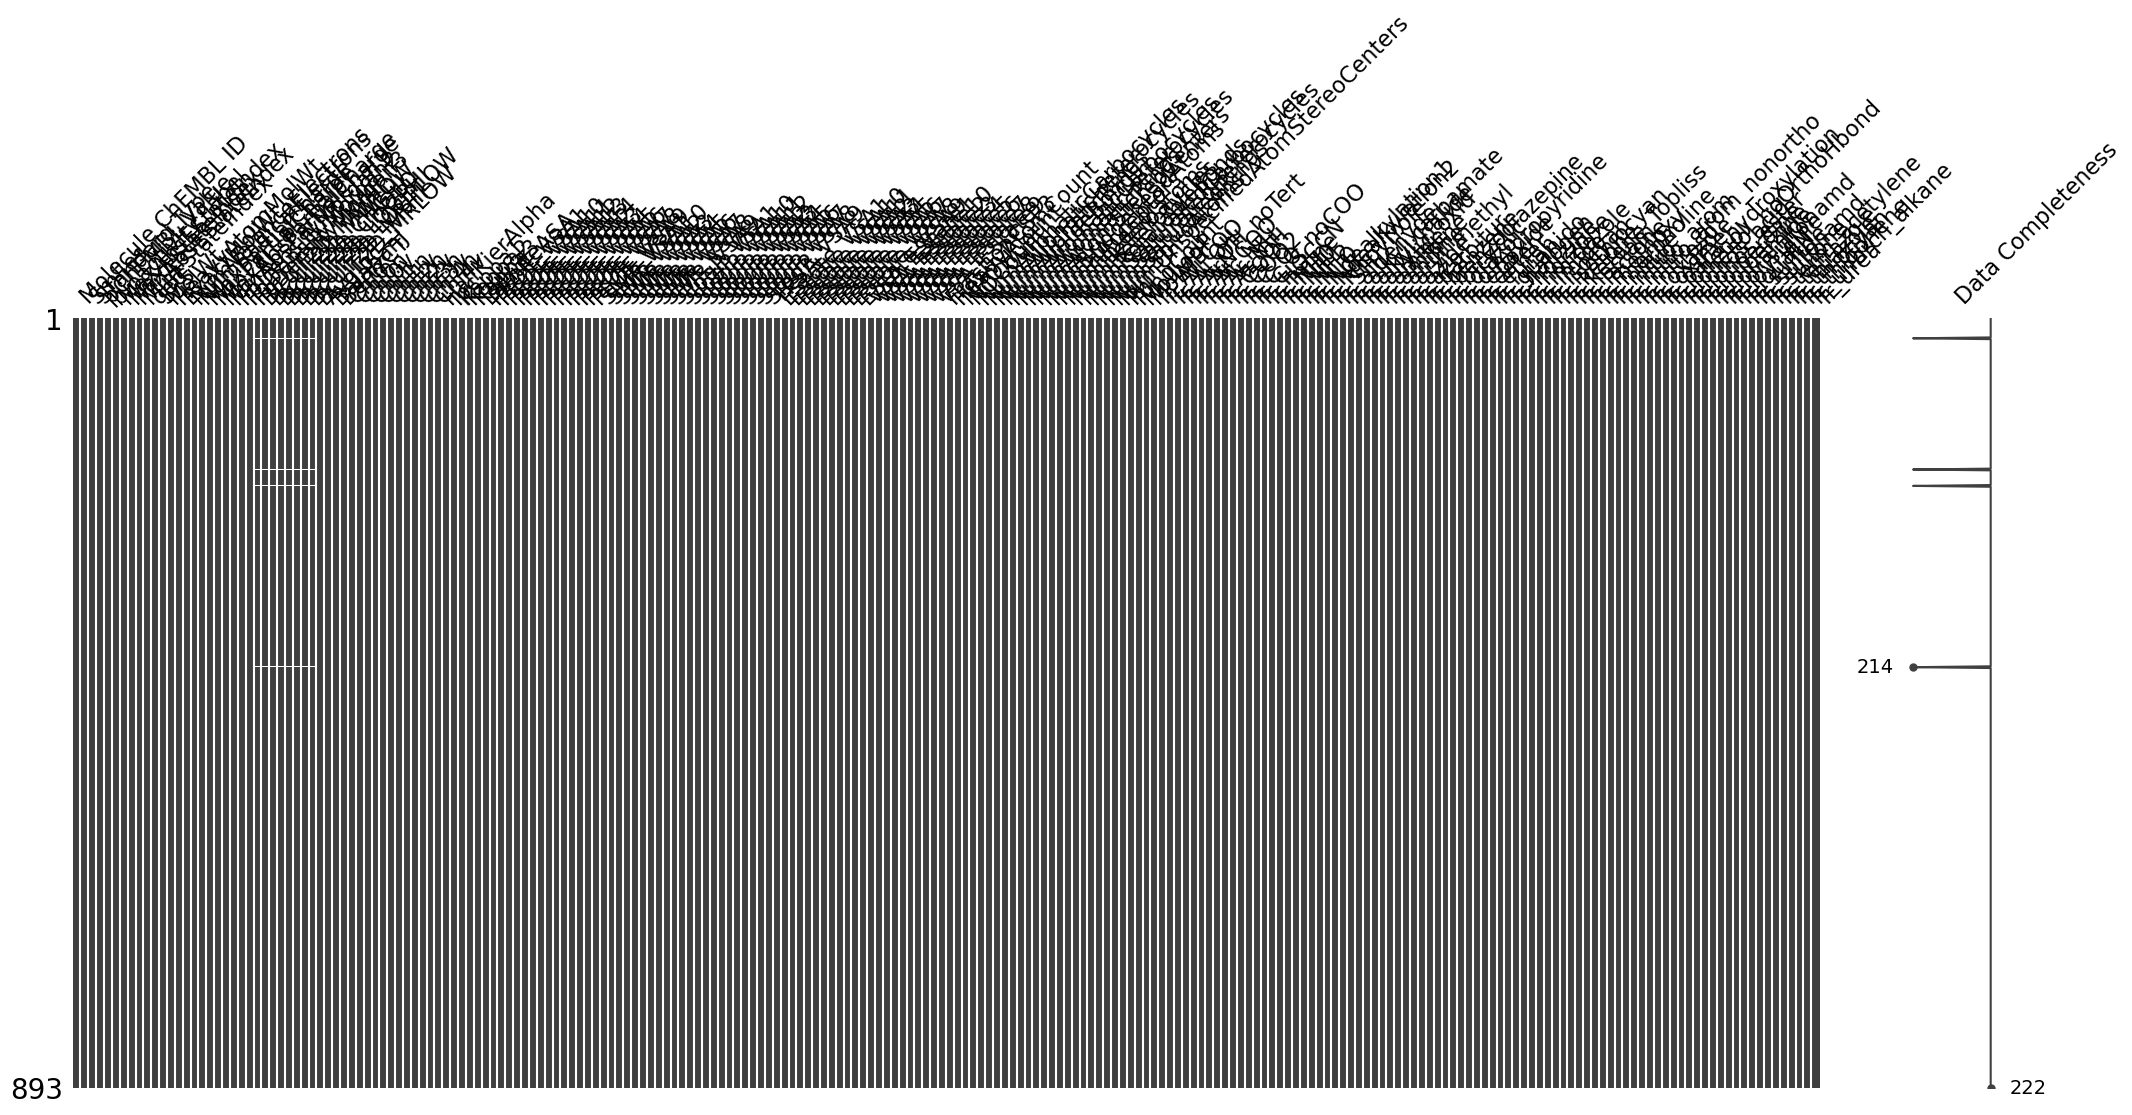

In [395]:
#This is to check for missing values in the descriptors
!pip install missingno
import missingno as msno
msno.matrix(Final_df,labels=True)

In [396]:
Final_df.columns.values

array(['Molecule ChEMBL ID', 'Smiles', 'Standard Type', 'pChEMBL Value',
       'bioactivity_label', 'MaxAbsEStateIndex', 'MaxEStateIndex',
       'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt',
       'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons',
       'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge',
       'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI',
       'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI',
       'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc',
       'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n',
       'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v',
       'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA',
       'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12',
       'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4',
       'PEOE_VSA5', 'PEOE_VSA6', 

In [397]:
#This is to check if there is a missing values present in this column
Final_df.BCUT2D_MWLOW.unique()

array([10.07168273,  9.73344635, 10.1220229 ,  9.92365068,  9.9236501 ,
        9.92372345,  9.92346331,  9.92346005,  9.92372771,  9.92372372,
        9.81527233,  9.9852348 , 10.0643506 , 10.0643498 , 10.05361196,
       10.09518733, 10.09518765, 10.09505817,  9.92347966, 10.10952073,
        9.97873891,  9.98747719, 10.04354654,         nan, 10.14391827,
       10.10119946,  9.8960526 ,  9.94407618,  9.94407555,  9.923422  ,
        9.92344722, 10.0435272 ,  9.47757994, 10.11518211,  9.79012961,
        9.86144344,  9.86027981,  9.8612084 ,  9.8613631 , 10.14516465,
        9.86144646, 10.11468189,  9.94407089,  9.94406955,  9.94407823,
       10.03904742,  9.9440654 , 10.04351765, 10.05361319,  9.79011092,
        9.94266305, 10.02335429,  9.95090316, 10.24389103,  9.94405461,
        9.94405257,  9.94405196,  9.7901045 ,  9.85853172,  9.88803803,
        9.89810411,  9.90006871,  9.87774513,  9.89652984,  9.89175629,
       10.10536466, 10.04718158,  9.95858922,  9.95854038, 10.04

In [398]:
##This is to check if there is a missing values present in this column
Final_df.BCUT2D_CHGHI.unique()

array([2.27433213, 2.58893484, 2.12828193, 2.34945093, 2.34951712,
       2.3484803 , 2.34845367, 2.34849499, 2.34834341, 2.34836157,
       2.3245103 , 2.2199267 , 2.37116679, 2.37023553, 2.35463781,
       2.37019135, 2.37014119, 2.37844823, 2.34857927, 2.25545053,
       2.34500147, 2.34970132, 2.09795344,        nan, 2.15454901,
       2.10788154, 2.53160957, 2.52575226, 2.52574191, 2.34873502,
       2.34972622, 2.11461441, 2.58345163, 2.12419654, 2.26306858,
       2.42461057, 2.42845653, 2.42762708, 2.4251493 , 2.35545005,
       2.42505866, 2.15675692, 2.51552318, 2.51558075, 2.51515529,
       2.32635214, 2.51563712, 2.17365693, 2.35458922, 2.40820416,
       2.45564015, 2.20908283, 2.24975478, 2.38031033, 2.51647041,
       2.51661913, 2.51671052, 2.40893975, 2.21827583, 2.53096484,
       2.5317085 , 2.53131547, 2.53279923, 2.53154522, 2.53263786,
       2.24487495, 2.23669689, 2.26447028, 2.25776033, 2.23005299,
       2.08221918, 2.27599184, 2.0807984 , 2.36041122, 2.40744

In [399]:
#This is to drop the 8 column that contains missing values 
Final_df.drop(['BCUT2D_MWLOW', 'BCUT2D_CHGHI','BCUT2D_CHGLO','BCUT2D_LOGPHI','BCUT2D_LOGPLOW','BCUT2D_MRHI','BCUT2D_MRLOW', 'BCUT2D_MWHI'], axis=1, inplace=True)
Final_df

,Molecule ChEMBL ID,Smiles,Standard Type,pChEMBL Value,bioactivity_label,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL177257,CCOC(=O)c1c(O)c2cccc(F)c2[n+]2ccccc12.[Cl-],EC50,4.15,inactive,14.128904,14.128904,0.000000,-0.634388,0.397055,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL4465098,COc1ccc(C(F)(F)F)cc1CO[C@@H]1[C@@H](C(C)(C)C)[...,EC50,5.88,inactive,14.108774,14.108774,0.195118,-4.549091,0.398986,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL3354673,O=C(Nc1ccc2cc[nH]c2c1)c1c[nH]c2ccccc2c1=O,EC50,7.00,active,12.444161,12.444161,0.092854,-0.427862,0.531276,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL195438,CCCCN(C(C)=O)c1ccc(NC(=O)[C@H]2Cc3ccccc3CN2C(=...,EC50,7.18,active,13.904154,13.904154,0.019909,-0.704586,0.242770,...,0,0,0,0,0,0,0,0,1,0
4,CHEMBL365601,CCCCCN(C(C)=O)c1ccc(NC(=O)[C@H]2Cc3ccccc3CN2C(...,EC50,7.15,active,13.925908,13.925908,0.012823,-0.705059,0.202470,...,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.89,active,12.938165,12.938165,0.030506,-0.508878,0.568603,...,0,0,0,0,0,0,0,0,0,0
889,CHEMBL2103870,Cc1ccc(NC(=O)C2(c3ccc4c(c3)OC(F)(F)O4)CC2)nc1-...,Kd,4.14,inactive,13.341895,13.341895,0.075563,-3.722131,0.580086,...,0,0,0,0,0,0,0,0,0,0
890,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.47,active,12.938165,12.938165,0.030506,-0.508878,0.568603,...,0,0,0,0,0,0,0,0,0,0
891,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.17,active,12.938165,12.938165,0.030506,-0.508878,0.568603,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

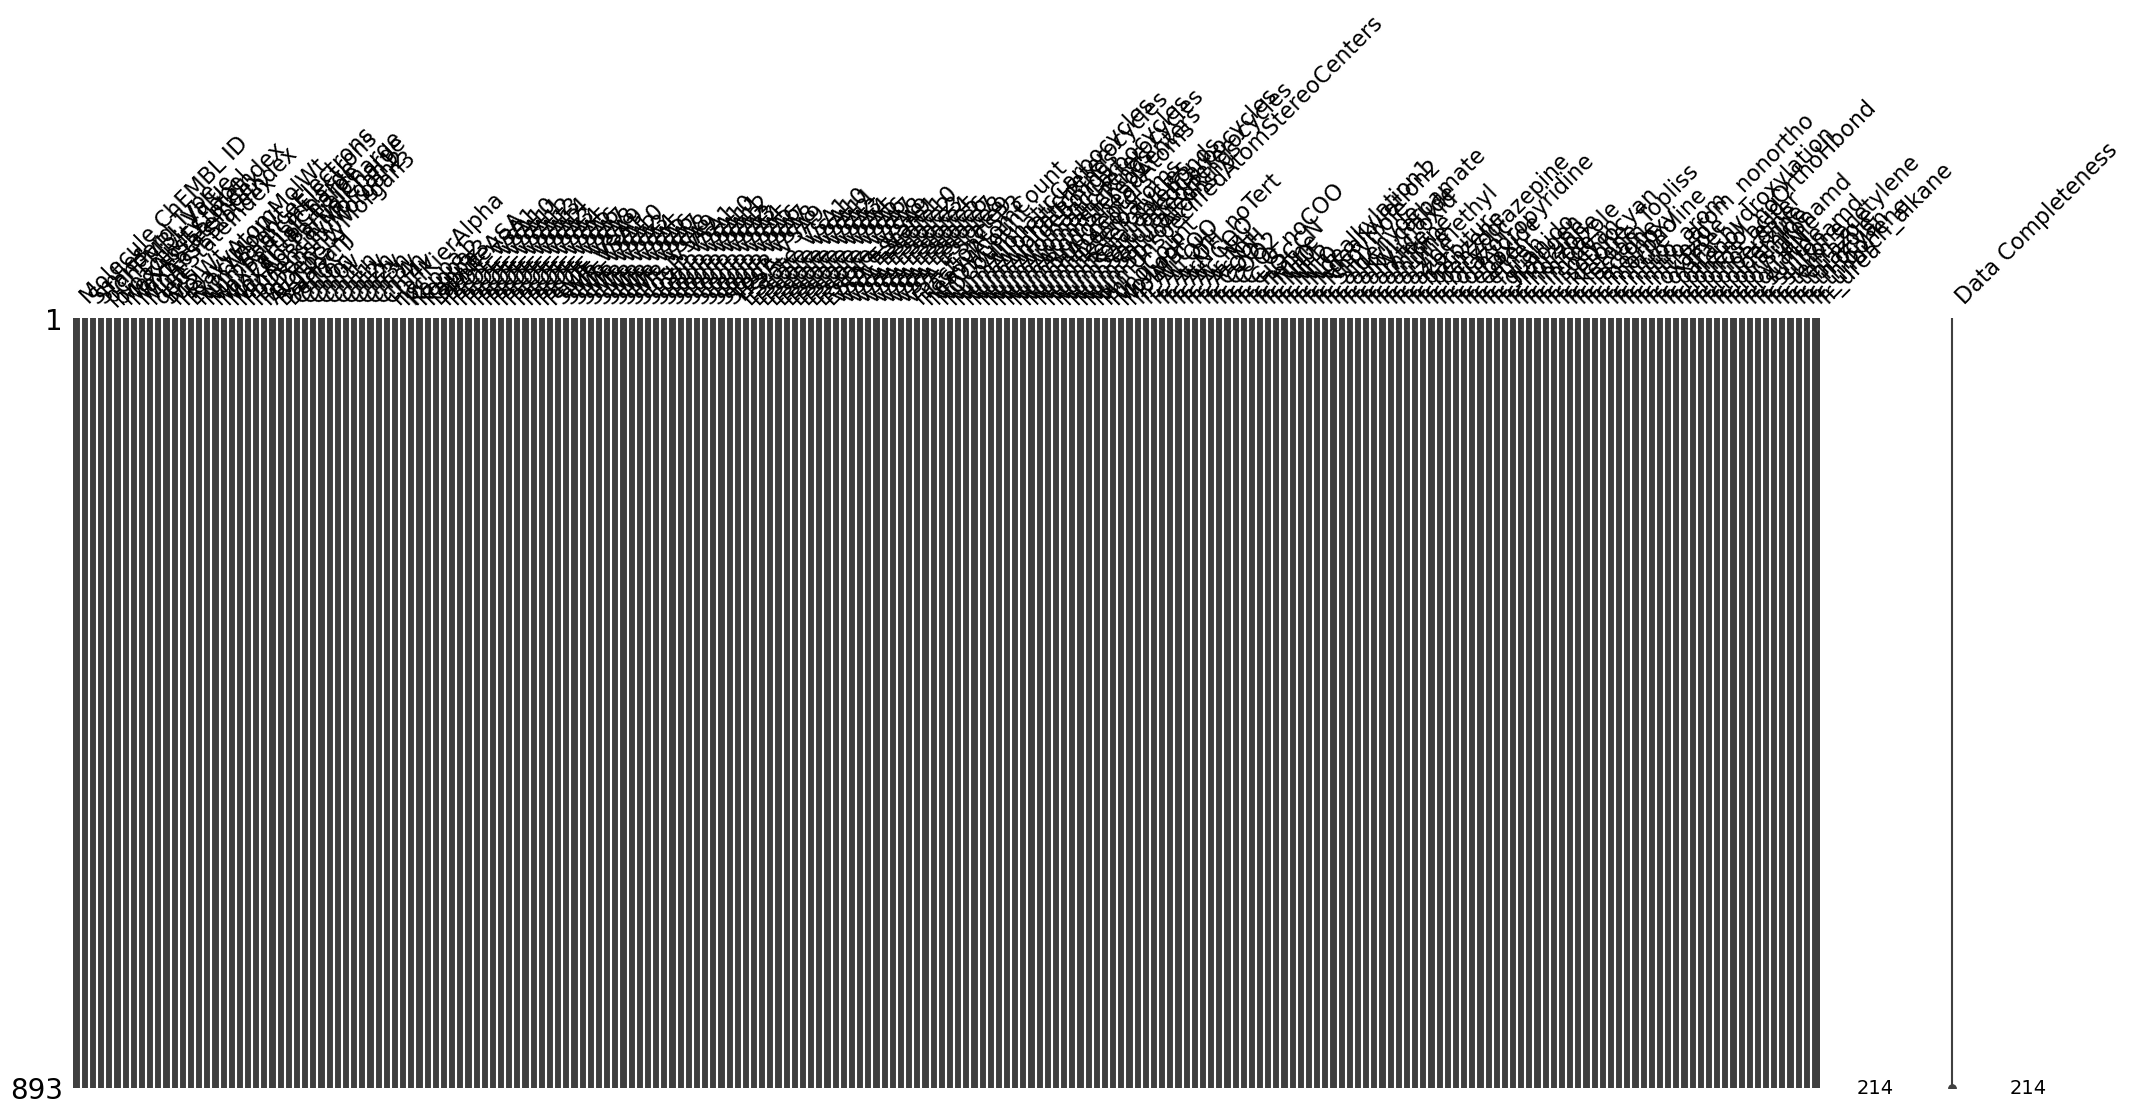

In [400]:
#This is to confirm there is no missing values 
msno.matrix(Final_df,labels=True)

# EXPLORATORY DATA ANALYSIS

In [402]:
Final_df

,Molecule ChEMBL ID,Smiles,Standard Type,pChEMBL Value,bioactivity_label,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL177257,CCOC(=O)c1c(O)c2cccc(F)c2[n+]2ccccc12.[Cl-],EC50,4.15,inactive,14.128904,14.128904,0.000000,-0.634388,0.397055,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL4465098,COc1ccc(C(F)(F)F)cc1CO[C@@H]1[C@@H](C(C)(C)C)[...,EC50,5.88,inactive,14.108774,14.108774,0.195118,-4.549091,0.398986,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL3354673,O=C(Nc1ccc2cc[nH]c2c1)c1c[nH]c2ccccc2c1=O,EC50,7.00,active,12.444161,12.444161,0.092854,-0.427862,0.531276,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL195438,CCCCN(C(C)=O)c1ccc(NC(=O)[C@H]2Cc3ccccc3CN2C(=...,EC50,7.18,active,13.904154,13.904154,0.019909,-0.704586,0.242770,...,0,0,0,0,0,0,0,0,1,0
4,CHEMBL365601,CCCCCN(C(C)=O)c1ccc(NC(=O)[C@H]2Cc3ccccc3CN2C(...,EC50,7.15,active,13.925908,13.925908,0.012823,-0.705059,0.202470,...,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.89,active,12.938165,12.938165,0.030506,-0.508878,0.568603,...,0,0,0,0,0,0,0,0,0,0
889,CHEMBL2103870,Cc1ccc(NC(=O)C2(c3ccc4c(c3)OC(F)(F)O4)CC2)nc1-...,Kd,4.14,inactive,13.341895,13.341895,0.075563,-3.722131,0.580086,...,0,0,0,0,0,0,0,0,0,0
890,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.47,active,12.938165,12.938165,0.030506,-0.508878,0.568603,...,0,0,0,0,0,0,0,0,0,0
891,CHEMBL2010601,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,EC50,7.17,active,12.938165,12.938165,0.030506,-0.508878,0.568603,...,0,0,0,0,0,0,0,0,0,0


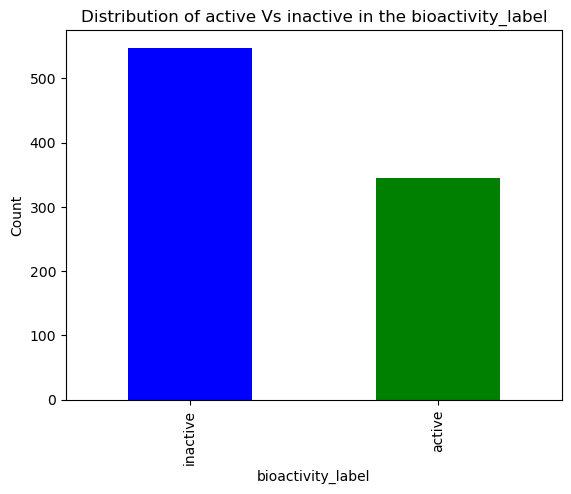

bioactivity_label
inactive    548
active      345
Name: count, dtype: int64


In [403]:
#This is plotting a counterplot to observe the distibution of the bioactivity label
Final_df['bioactivity_label'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('bioactivity_label')
plt.ylabel('Count')
plt.title('Distribution of active Vs inactive in the bioactivity_label')
plt.show()
print(Final_df['bioactivity_label'].value_counts())

Text(0.5, 1.0, 'A boxplot showing the distribution of pChEMBL value of the bioactivity label')

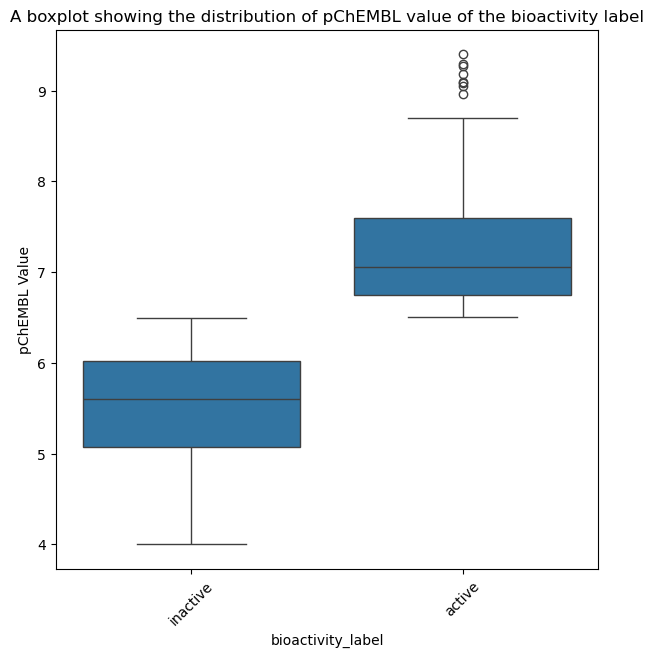

In [404]:
#This is plotting a boxplot to observe the distribution of standard value and bioactivity label
data=pd.concat([Final_df['bioactivity_label'],Final_df['pChEMBL Value']],axis=1)
fig,ax=plt.subplots(figsize=(7,7))
sns.boxplot(x='bioactivity_label',y='pChEMBL Value',data=Final_df)
xt=plt.xticks(rotation=45)
plt.ylabel('pChEMBL Value')
plt.title('A boxplot showing the distribution of pChEMBL value of the bioactivity label')

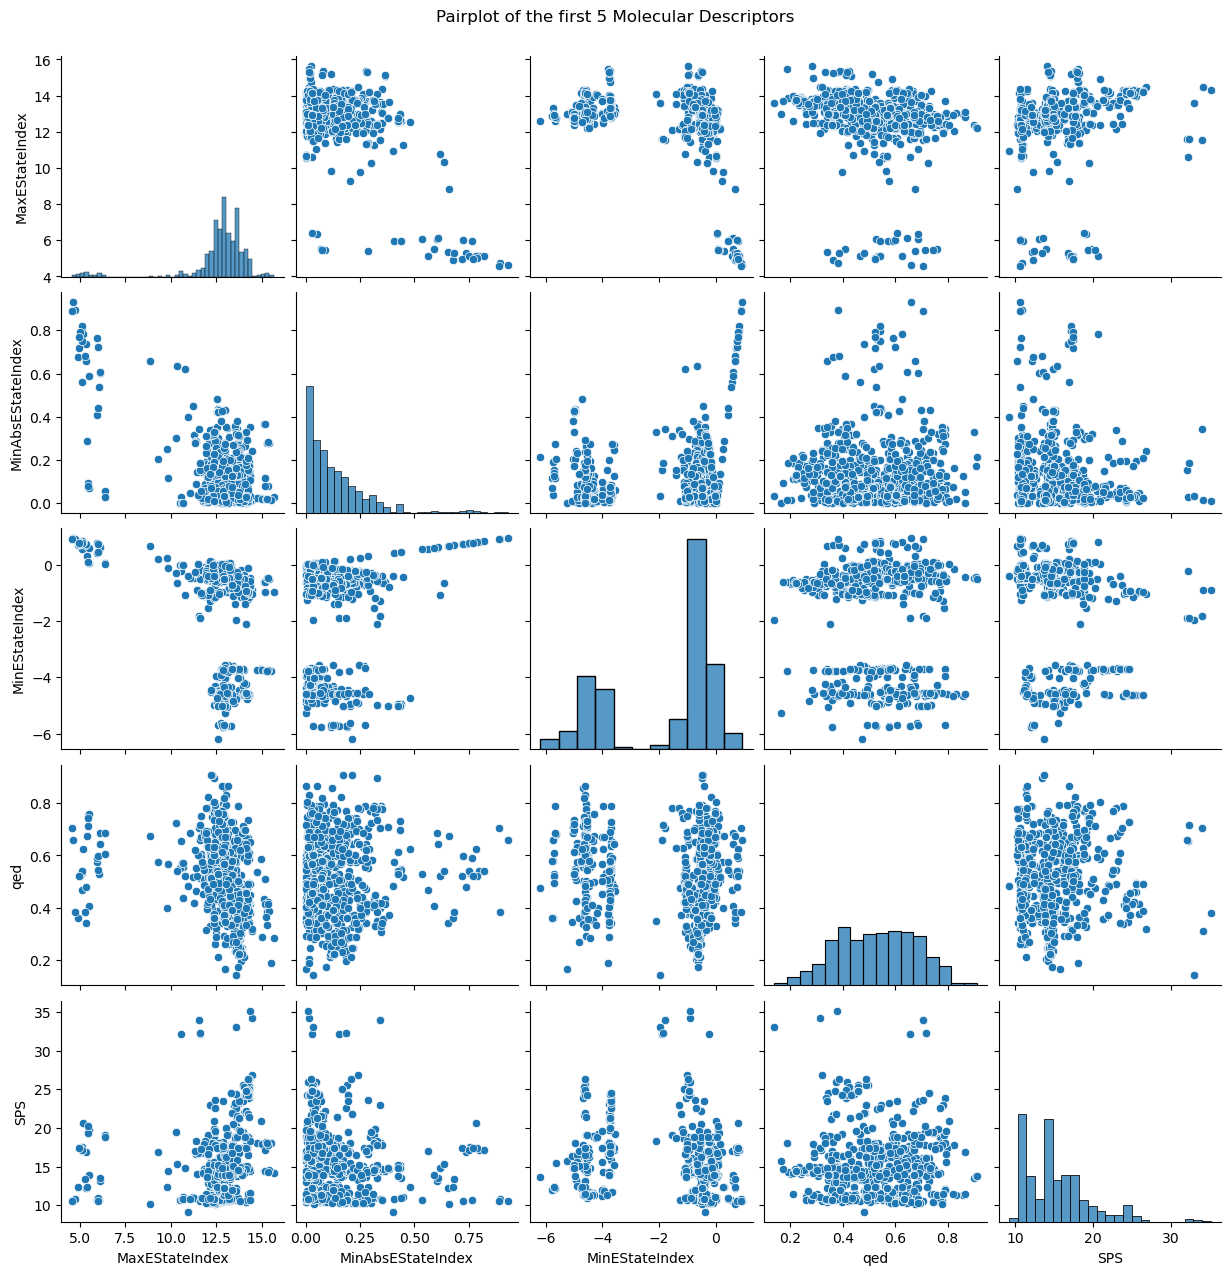

In [405]:
#This is plotting a pairplot of the first 5 descriptors
selected_features = Final_df.columns[6:11] 
sns.pairplot(Final_df[selected_features])
plt.suptitle("Pairplot of the first 5 Molecular Descriptors", y=1.02)
plt.show()

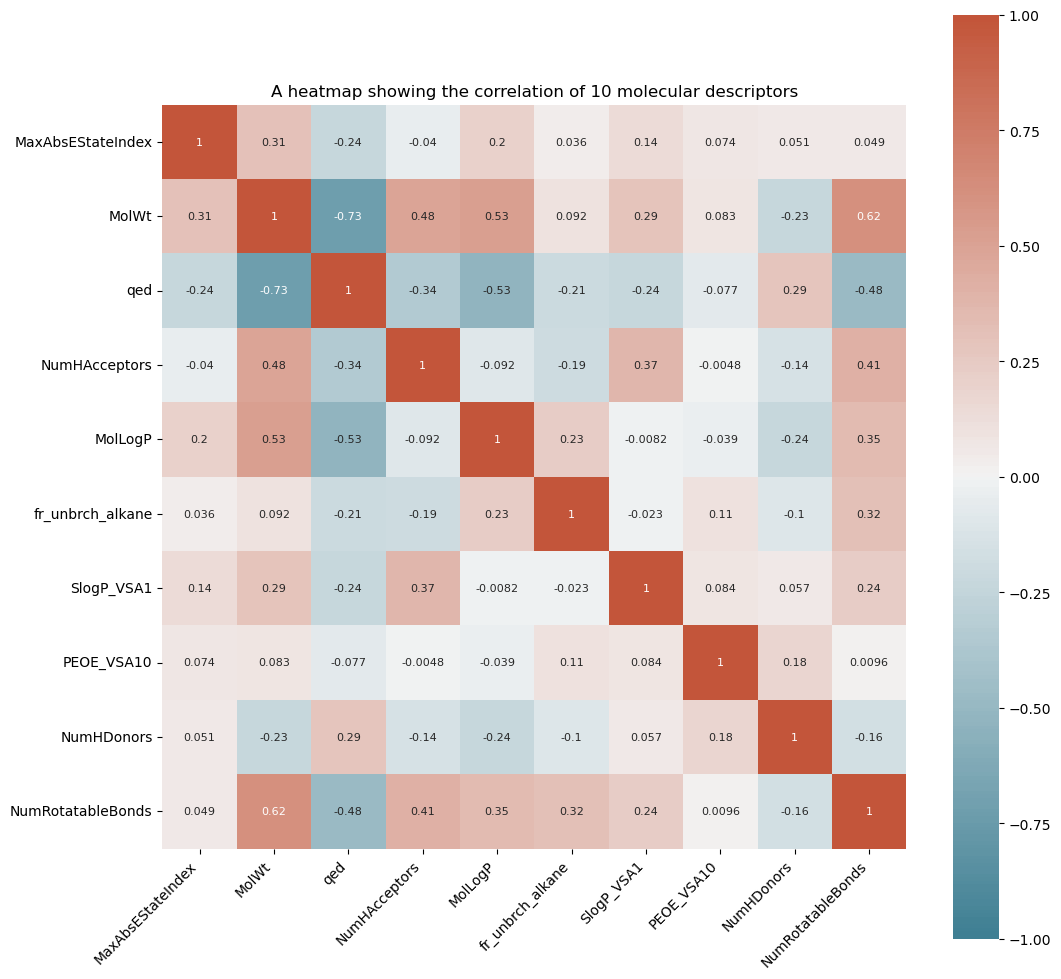

In [406]:
#This is plotting a heatmap to observe the correlations between 10 columns
selected = ['MaxAbsEStateIndex', 'MolWt', 'qed', 'NumHAcceptors', 'MolLogP', 'fr_unbrch_alkane', 'SlogP_VSA1', 'PEOE_VSA10', 'NumHDonors', 'NumRotatableBonds']
plt.figure(figsize=(12, 12))
corr = Final_df[selected].corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('A heatmap showing the correlation of 10 molecular descriptors')
plt.show()

Text(0.5, 1.0, 'A violinplot showing the distribution of the HeavyAtomCount in the bioactivity label')

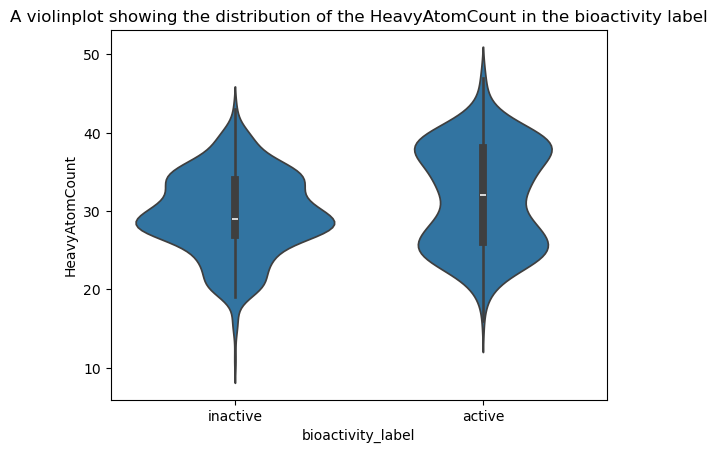

In [407]:
#This is plotting a violin plot to show the distribution of HHeavyAtomCount in the bioactivity label
sns.violinplot(x='bioactivity_label', y='HeavyAtomCount', data=Final_df)
plt.title('A violinplot showing the distribution of the HeavyAtomCount in the bioactivity label')

# FEATURE SELECTION USING MUTUAL INFORMATION

In [409]:
#This is to drop the first 4 column as they are no longer needed
Final_df.drop(['Molecule ChEMBL ID', 'Smiles', 'pChEMBL Value', 'Standard Type'], axis=1, inplace=True)
Final_df

,bioactivity_label,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,inactive,14.128904,14.128904,0.000000,-0.634388,0.397055,10.454545,321.735,308.631,321.056799,...,0,0,0,0,0,0,0,0,0,0
1,inactive,14.108774,14.108774,0.195118,-4.549091,0.398986,24.225000,561.641,523.337,561.270208,...,0,0,0,0,0,0,0,0,0,0
2,active,12.444161,12.444161,0.092854,-0.427862,0.531276,10.956522,303.321,290.217,303.100777,...,0,0,0,0,0,0,0,0,0,0
3,active,13.904154,13.904154,0.019909,-0.704586,0.242770,14.047619,561.682,526.402,561.262757,...,0,0,0,0,0,0,0,0,1,0
4,active,13.925908,13.925908,0.012823,-0.705059,0.202470,14.000000,575.709,538.413,575.278407,...,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,active,12.938165,12.938165,0.030506,-0.508878,0.568603,12.206897,392.499,364.275,392.209993,...,0,0,0,0,0,0,0,0,0,0
889,inactive,13.341895,13.341895,0.075563,-3.722131,0.580086,16.818182,452.413,434.269,452.118378,...,0,0,0,0,0,0,0,0,0,0
890,active,12.938165,12.938165,0.030506,-0.508878,0.568603,12.206897,392.499,364.275,392.209993,...,0,0,0,0,0,0,0,0,0,0
891,active,12.938165,12.938165,0.030506,-0.508878,0.568603,12.206897,392.499,364.275,392.209993,...,0,0,0,0,0,0,0,0,0,0


In [410]:
#This is applying label encoding on bioactivity_label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Final_df['bioactivity_label'] = le.fit_transform(Final_df['bioactivity_label'])
Final_df

,bioactivity_label,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1,14.128904,14.128904,0.000000,-0.634388,0.397055,10.454545,321.735,308.631,321.056799,...,0,0,0,0,0,0,0,0,0,0
1,1,14.108774,14.108774,0.195118,-4.549091,0.398986,24.225000,561.641,523.337,561.270208,...,0,0,0,0,0,0,0,0,0,0
2,0,12.444161,12.444161,0.092854,-0.427862,0.531276,10.956522,303.321,290.217,303.100777,...,0,0,0,0,0,0,0,0,0,0
3,0,13.904154,13.904154,0.019909,-0.704586,0.242770,14.047619,561.682,526.402,561.262757,...,0,0,0,0,0,0,0,0,1,0
4,0,13.925908,13.925908,0.012823,-0.705059,0.202470,14.000000,575.709,538.413,575.278407,...,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,0,12.938165,12.938165,0.030506,-0.508878,0.568603,12.206897,392.499,364.275,392.209993,...,0,0,0,0,0,0,0,0,0,0
889,1,13.341895,13.341895,0.075563,-3.722131,0.580086,16.818182,452.413,434.269,452.118378,...,0,0,0,0,0,0,0,0,0,0
890,0,12.938165,12.938165,0.030506,-0.508878,0.568603,12.206897,392.499,364.275,392.209993,...,0,0,0,0,0,0,0,0,0,0
891,0,12.938165,12.938165,0.030506,-0.508878,0.568603,12.206897,392.499,364.275,392.209993,...,0,0,0,0,0,0,0,0,0,0


In [411]:
#This is to perform Feature Selection Using Mutual Information on the molecular descriptors
X = Final_df.drop(columns=['fr_urea'])  # Features
y = Final_df['bioactivity_label']  # Target

# Compute Mutual Information
mutual_info = mutual_info_classif(X, y, discrete_features='auto')

# Display Results
mi_scores = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)
print("Mutual Information Scores:")
print(mi_scores)

Mutual Information Scores:
bioactivity_label      0.668202
MinAbsPartialCharge    0.279317
MaxPartialCharge       0.251087
MinPartialCharge       0.244003
SMR_VSA7               0.234869
                         ...   
fr_ArN                 0.000000
fr_hdrzone             0.000000
fr_isothiocyan         0.000000
fr_ketone              0.000000
fr_hdrzine             0.000000
Length: 209, dtype: float64


In [412]:
#This selects the top 80 relevant features based on mutual information scores
top_features = 80
relevant_features = mi_scores.sort_values(ascending=False).head(top_features).index.tolist()
Model_data = Final_df[relevant_features]

# TRAINING OF MODELS WITH DATA AUGEMENTATION AND HYPERPARAMETER TUNING

In [414]:
Model_data

,bioactivity_label,MinAbsPartialCharge,MaxPartialCharge,MinPartialCharge,SMR_VSA7,SMR_VSA10,TPSA,MaxAbsPartialCharge,SlogP_VSA5,SlogP_VSA2,...,Chi2n,Chi3v,SlogP_VSA10,Chi2v,Chi4v,VSA_EState8,SMR_VSA9,NumValenceElectrons,VSA_EState10,HeavyAtomCount
0,1,0.348321,0.348321,-1.000000,53.975718,22.388931,50.63,1.000000,17.281726,17.682715,...,4.535961,3.315189,4.390415,4.535961,2.453581,1.878424,5.749512,114,0.0,22
1,1,0.415926,0.415926,-0.496386,65.221291,11.876485,76.07,0.496386,75.607515,41.138527,...,11.910851,8.246689,13.171245,11.910851,6.402935,5.480021,5.749512,218,0.0,40
2,0,0.260648,0.260648,-0.361114,76.711403,33.400416,77.75,0.361114,10.357989,15.875137,...,5.310883,3.845840,5.687386,5.310883,2.660222,0.000000,0.000000,112,0.0,23
3,0,0.254486,0.254486,-0.457358,119.818595,29.096312,78.95,0.457358,48.174009,35.208046,...,10.424967,7.433866,11.374773,10.424967,5.188581,4.610800,11.499024,214,0.0,42
4,0,0.254486,0.254486,-0.457358,119.818595,29.096312,78.95,0.457358,54.594831,35.208046,...,10.778520,7.683866,11.374773,10.778520,5.392270,4.677101,11.499024,220,0.0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,0,0.260657,0.260657,-0.507573,69.508728,22.497491,82.19,0.507573,63.027315,15.997686,...,9.446123,5.033031,5.687386,9.446123,3.438744,12.225229,5.749512,152,0.0,29
889,1,0.477639,0.585787,-0.477639,71.287658,17.694348,97.75,0.585787,34.326535,28.261641,...,8.113192,5.860034,14.598693,8.113192,3.944584,1.839433,22.756403,168,0.0,33
890,0,0.260657,0.260657,-0.507573,69.508728,22.497491,82.19,0.507573,63.027315,15.997686,...,9.446123,5.033031,5.687386,9.446123,3.438744,12.225229,5.749512,152,0.0,29
891,0,0.260657,0.260657,-0.507573,69.508728,22.497491,82.19,0.507573,63.027315,15.997686,...,9.446123,5.033031,5.687386,9.446123,3.438744,12.225229,5.749512,152,0.0,29


In [415]:
#This is spliiting the dataset into X and y
X = Model_data.iloc[:, 1:].values
y = Model_data.iloc[:, 0].values

In [416]:
print(X)

[[  0.34832086   0.34832086  -1.         ... 114.           0.
   22.        ]
 [  0.41592553   0.41592553  -0.49638559 ... 218.           0.
   40.        ]
 [  0.26064807   0.26064807  -0.36111424 ... 112.           0.
   23.        ]
 ...
 [  0.26065734   0.26065734  -0.50757284 ... 152.           0.
   29.        ]
 [  0.26065734   0.26065734  -0.50757284 ... 152.           0.
   29.        ]
 [  0.26065734   0.26065734  -0.50757284 ... 152.           0.
   29.        ]]


In [417]:
print(y)

[1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0
 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1
 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1
 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1
 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1
 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1
 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0
 0 1 1 0 1 0 0 1 0 0 0 1 

In [418]:
#This is to normalise the data before splitting into training and testing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [419]:
#This is splitting the dataset into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

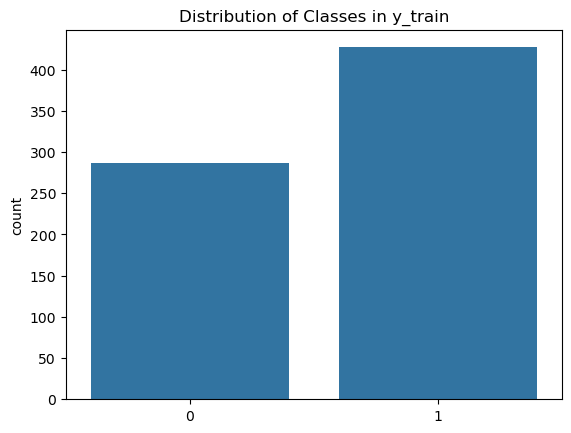

Class Distribution in y_train:


1    427
0    287
Name: count, dtype: int64

In [420]:
#This is to plot a counterplot to check the distribution of the y_train 
sns.countplot(x=y_train)
plt.title('Distribution of Classes in y_train')
plt.show()
print("Class Distribution in y_train:")
pd.Series(y_train).value_counts()

In [421]:
# Balancing the y_train using SMOTE
!pip install -U scikit-learn imbalanced-learn
from imblearn.over_sampling import SMOTE
smote= SMOTE(random_state= 42)
X_train_smote,y_train_smote = smote.fit_resample(X_train, y_train)

  Using cached scikit_learn-1.7.0-cp312-cp312-win_amd64.whl.metadata (14 kB)


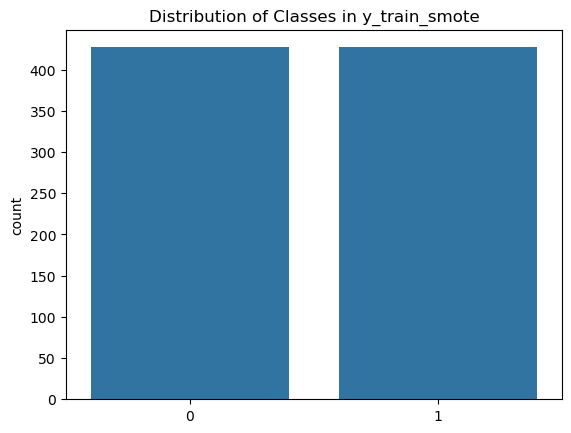

Class Distribution in y_train_smote:


0    427
1    427
Name: count, dtype: int64

In [422]:
#Creating a graph to show the distribution of y_train after SMOTE.
sns.countplot(x=y_train_smote)
plt.title('Distribution of Classes in y_train_smote')
plt.show() 
print("Class Distribution in y_train_smote:")
pd.Series(y_train_smote).value_counts()

In [423]:
import numpy as np
import random
np.random.seed(42)
random.seed(42)

In [424]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

rfc = RandomForestClassifier(random_state=42)

# This is to define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
    
    
}

# This is to use GridSearchCV to find the best parameters
cv1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rfc_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=cv1, n_jobs = -1, scoring= 'accuracy')
rfc_cv.fit(X_train_smote, y_train_smote)

# This is to print the best parameters and best score
best_parameter = rfc_cv.best_params_
print("Best parameters found:", best_parameter)
print("Best Cross-Validation Score:", rfc_cv.best_score_)

Best parameters found: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validation Score: 0.827891296869625


Accuracy: 0.83
Precision: 0.93
Recall: 0.80
F1 score: 0.86

Confusion Matrix for RandomForest:


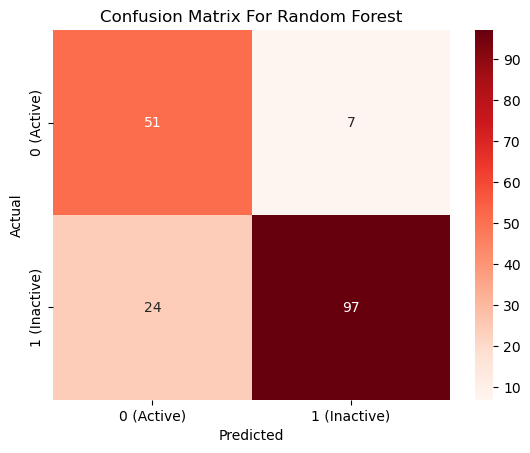

In [425]:
#This is to train the model based on the best parameter
# Create a RandomForest model
classifier_rf = RandomForestClassifier(max_depth = 10, max_features = 'sqrt', min_samples_leaf= 1, min_samples_split= 5, n_estimators = 50, random_state = 42)
# Train the model on the training data
classifier_rf.fit(X_train_smote,y_train_smote)
# Make predictions on the testing data
y_pred = classifier_rf.predict(X_test)

#This is to caluate the accuracy, precison, recall and F1-score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")
f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1:.2f}")

#This is to plot the confusion matrix
print("\nConfusion Matrix for RandomForest:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='d', xticklabels=['0 (Active)', '1 (Inactive)'], yticklabels=['0 (Active)', '1 (Inactive)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For Random Forest')
plt.show()

In [426]:
knn = KNeighborsClassifier()

# This is to define the hyperparameter grid for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan','minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# This is to use GridSearchCV to find the best parameters
cv1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
knn_cv = GridSearchCV(knn, param_grid, cv=cv1, scoring='accuracy')
knn_cv.fit(X_train_smote, y_train_smote)

# This is to print the best parameters and best score
print("Best parameters found:", knn_cv.best_params_)
print("Best Cross-Validation Score:", knn_cv.best_score_)

Best parameters found: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best Cross-Validation Score: 0.7377433780529756


Accuracy: 0.69
Precision: 0.82
Recall: 0.69
F1 score: 0.75

Confusion Matrix for KNN:


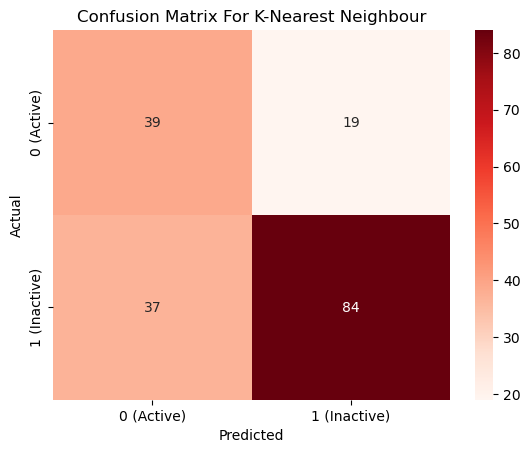

In [427]:
# Create a KNN model
classifier_knn = KNeighborsClassifier(algorithm = 'auto', metric = 'manhattan', n_neighbors = 5, p= 1, weights ='uniform')
# Train the model on the training data
classifier_knn.fit(X_train_smote,y_train_smote)
# Make predictions on the testing data
y_pred = classifier_knn.predict(X_test)
#Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")
f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1:.2f}")

#plotting the confusion matrix
print("\nConfusion Matrix for KNN:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='d', xticklabels=['0 (Active)', '1 (Inactive)' ], yticklabels=['0 (Active)', '1 (Inactive)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For K-Nearest Neighbour')
plt.show()

In [428]:
log = LogisticRegression(solver='liblinear', penalty= 'l1', max_iter = 10000)
# This is to define the hyperparameter grid for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1','l2']
}
 
# This is to use GridSearchCV to find the best parameters
cv1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
log_cv = GridSearchCV(log, param_grid=param_grid, cv=cv1, scoring='accuracy')
log_cv.fit(X_train_smote, y_train_smote)
 
# This is to print the best parameters and best score
print("Best parameters:", log_cv.best_params_)
print("Best Cross-Validation Score:", log_cv.best_score_)

Best parameters: {'C': 10, 'penalty': 'l1'}
Best Cross-Validation Score: 0.7904299965600275


Accuracy: 0.77
Precision: 0.93
Recall: 0.71
F1 score: 0.81

Confusion Matrix for Logistic Regression:


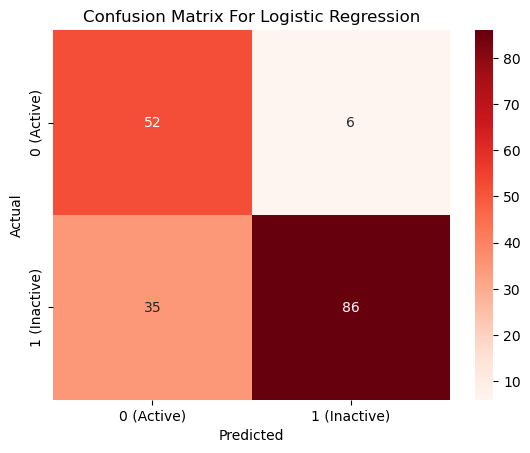

In [429]:
# Create a Logistic regression model
classifier_lr = LogisticRegression(solver='liblinear',  C= 10, penalty= 'l1', max_iter=10000)
# Train the model on the training data
classifier_lr.fit(X_train_smote,y_train_smote)
# Make predictions on the testing data
y_pred = classifier_lr.predict(X_test)
#Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")
f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1:.2f}")

#plotting the confusion matrix
print("\nConfusion Matrix for Logistic Regression:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='d', xticklabels=['0 (Active)', '1 (Inactive)'], yticklabels=['0 (Active)', '1 (Inactive)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For Logistic Regression')
plt.show()

In [430]:
dtree = DecisionTreeClassifier(random_state=42)

# This is to define the hyperparameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'splitter': ['best', 'random'],
}

# This is to use GridSearchCV to find the best parameters
cv1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dtree_cv = GridSearchCV(dtree, param_grid=param_grid, cv=cv1, scoring='accuracy', n_jobs=-1)
dtree_cv.fit(X_train_smote, y_train_smote)

# This is to print the best parameters and best score
print("Best parameters found: ", dtree_cv.best_params_)
print("Best Cross-Validation Score: ", dtree_cv.best_score_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'splitter': 'random'}
Best Cross-Validation Score:  0.7904299965600275


Accuracy: 0.72
Precision: 0.90
Recall: 0.65
F1 score: 0.76

Confusion Matrix for Decision Tree:


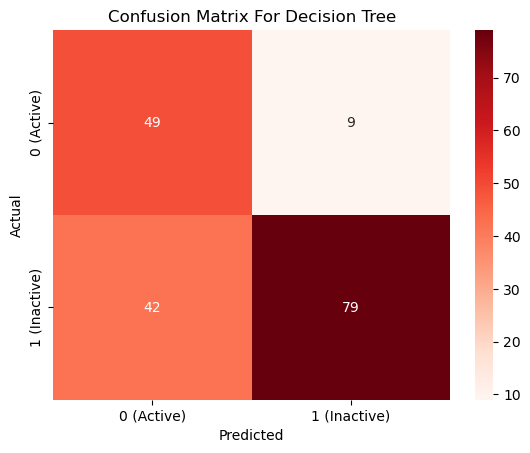

In [431]:
# Create a Decision Tree model
classifier_dt = DecisionTreeClassifier(criterion= 'entropy', max_depth = 10, min_samples_split= 2, splitter = 'random', random_state = 42)
# Train the model on the training data
classifier_dt.fit(X_train_smote,y_train_smote)
# Make predictions on the testing data
y_pred = classifier_dt.predict(X_test)
#Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")
f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1:.2f}")

#plotting the confusion matrix
print("\nConfusion Matrix for Decision Tree:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='d', xticklabels=['0 (Active)', '1 (Inactive)'], yticklabels=['0 (Active)', '1 (Inactive)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For Decision Tree')
plt.show()

In [432]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
# This is to define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100,200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# This is to use GridSearchCV to find the best parameters
cv1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb_cv = GridSearchCV(xgb, param_grid=param_grid, scoring='accuracy', cv=cv1, n_jobs=-1)
xgb_cv.fit(X_train_smote, y_train_smote)

# This is to print the best parameters and best score
print("Best parameters:", xgb_cv.best_params_)
print("Best Cross-Validation Score:", xgb_cv.best_score_)

Best parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}
Best Cross-Validation Score: 0.834908840729274


Accuracy: 0.83
Precision: 0.91
Recall: 0.83
F1 score: 0.87

Confusion Matrix for XGBoost:


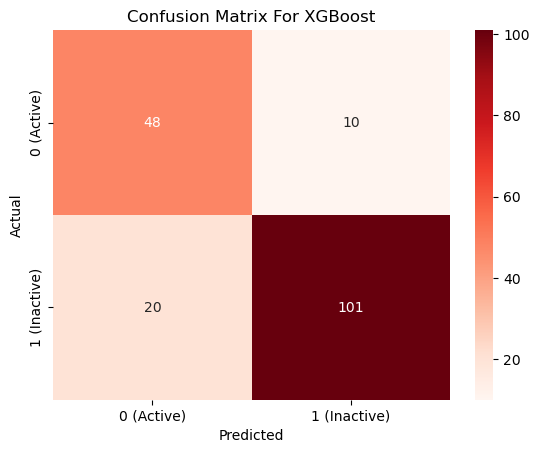

In [433]:
from xgboost import XGBClassifier
classifier_xg = XGBClassifier(eval_metric='mlogloss', colsample_bytree = 0.6, learning_rate = 0.1, max_depth = 5, n_estimators =200, subsample= 0.6, random_state=42)
# Train the model on the training data
classifier_xg.fit(X_train_smote,y_train_smote)
# Make predictions on the testing data
y_pred = classifier_xg.predict(X_test)
#Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")
f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1:.2f}")

#plotting the confusion matrix
print("\nConfusion Matrix for XGBoost:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='d', xticklabels=['0 (Active)', '1 (Inactive)'], yticklabels=['0 (Active)', '1 (Inactive)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For XGBoost')
plt.show()

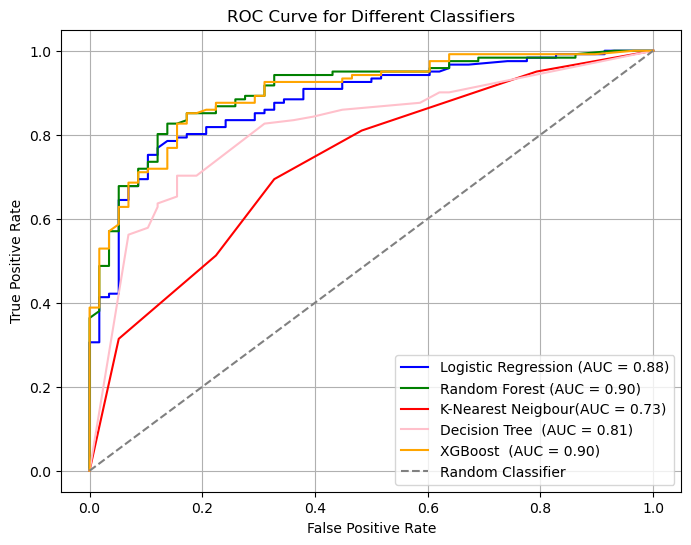

In [434]:
# Predict probabilities for positive class (class 1)
# Predicted probabilities for the positive class (class 1) are obtained using predict_proba
y_probs_lr = classifier_lr.predict_proba(X_test)[:, 1]
y_probs_rf = classifier_rf.predict_proba(X_test)[:, 1]
y_probs_knn = classifier_knn.predict_proba(X_test)[:, 1]
y_probs_dt = classifier_dt.predict_proba(X_test)[:, 1]
y_probs_xg = classifier_xg.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for each classifier
# False Postive Rate and True positive Rate for different threshold values are calculated for both logistic regression and Random Forest
fpr_lr, tpr_lr, thres_lr = roc_curve(y_test, y_probs_lr)
fpr_rf, tpr_rf, thres_rf = roc_curve(y_test, y_probs_rf)
fpr_knn, tpr_knn, thres_knn = roc_curve(y_test, y_probs_knn)
fpr_dt, tpr_dt, thres_dt = roc_curve(y_test, y_probs_dt)
fpr_xg, tpr_xg, thres_xg = roc_curve(y_test, y_probs_xg)

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_xg = auc(fpr_xg, tpr_xg)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='green')
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neigbour(AUC = {roc_auc_knn:.2f})', color='red')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree  (AUC = {roc_auc_dt:.2f})', color='pink')
plt.plot(fpr_xg, tpr_xg, label=f'XGBoost  (AUC = {roc_auc_xg:.2f})', color='orange')


# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Classifiers')
plt.legend()
plt.grid(True)
plt.show()